# Codeathon 1: Comparison of Regression Models on Housing Prices in Ames, Iowa

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
![(Image Credit Boston.gov)](https://miro.medium.com/max/1000/1*WYZCnpM7bE3Wq4NNxx7jDA.jpeg)

In this assignment, You are in charge of building a system to predict housing prices in Ames, Iowa. You need to find the best model given the Iowa Housing dataset, and then see if you can improve its performance further by tuning its hyperparameters.  You must evaluate your model using RMSE with 5-fold cross-validation. You can use Python’s Scikit-Learn API and Google Colab to present your solution and performance to your peers.

* **DOWNLOAD**: Download from Kaggle the Iowa Housing datasetLinks to an external site. in the [Ames Housing Dataset on Kaggle](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data). You will attempt to predict the housing prices in Ames, IA. For references, you may refer to my slides or the Google Colab if you need additional sample codes to help with your assignment. To get started, you will need to upload/copy the dataset (.csv) into the same Colab workspace.

* **CODE**: Using this provided template, apply the 8 main steps of an ML project on the selected data set. Write code in a Google Colab, download as a .ipynb file and submit via GradeScope before the deadline. For deliverables, you must write code in Colab and submit the downloaded Jupyter Notebook file (.ipynb) to earn a total of 50 pts. You will gain points depending on how you perform in the following sections.

* **PRESENT** (Optional): In a later class meeting, give a lightning talk to pitch your solution in 3-5 minutes. Prepare a presentation (in Google Slides) and email me the URL to be considered (3-5 submissions will be selected to present). You will earn 10 bonus points if you are not already one of the top 10 submissions.

**BONUS POINTS:** 10 bonus points will be given (as Extra credits) for those who score among the top-10 leaderboard while following strictly the assignment guidelines. Best of luck to all!

**IMPORTANT**: You must name your submission yourUVAID_codeathon_1.ipynb








## Step 1: Big Picture and Setup
Write a paragraph explaining the context of the problem in which you are trying to investigate. Your paragraph may frame the problem and objectives by answering the following questions:
* What is the task: regression, classification, clustering, visualization?
* What to expect, how to use, and how to benefit from this model?
* What performance measure to evaluate?
* How much data is available or should be collected?
* What learning algorithm to be used?
* How much effort is to be spent?
* Verify the assumptions that have been made about the context

In [ ]:
'''
This task is a regression as it attempts to make a prediction about a continuous variable, housing prices, based on existing information.
Ideally, this model will use existing data about housing prices to help predict what future prices will look like. This should benefit
prospective homeowners to help decide when they would like to invest in buying a house and how much they will need to expect to save.
The performance measure for this task will be the RMSE or root mean square error. The data we will use is the data set available to us
on Kaggle: Ames Housing Dataset. The learning algorithm I plan to use are the various regression algorithms: linear, tree, and forest.
Very little effort should be necessary since the model should run unsupervised.
'''

## Step 2: Load the Data
We will assume that the data file is put into the same workspace on Colab. Then, you can write some code to load the CSV file and take a quick look at the dataset, and output the following:

 * How big is your dataset? (in terms of MB)
 * How many entries does it have?
 * How many features does it have?
 * Does it contain any categorical data?
 * Is there any missing values?
 * What are some basic statistics you can learn right away about this dataset?

In [1]:
import sklearn

import numpy as np

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

# To help you get started, a load function is provided below.
# You will need to fill in the code under #TODO to make it work.
def loadBostonHousingData():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv('train.csv')
  return housing

data = loadBostonHousingData()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


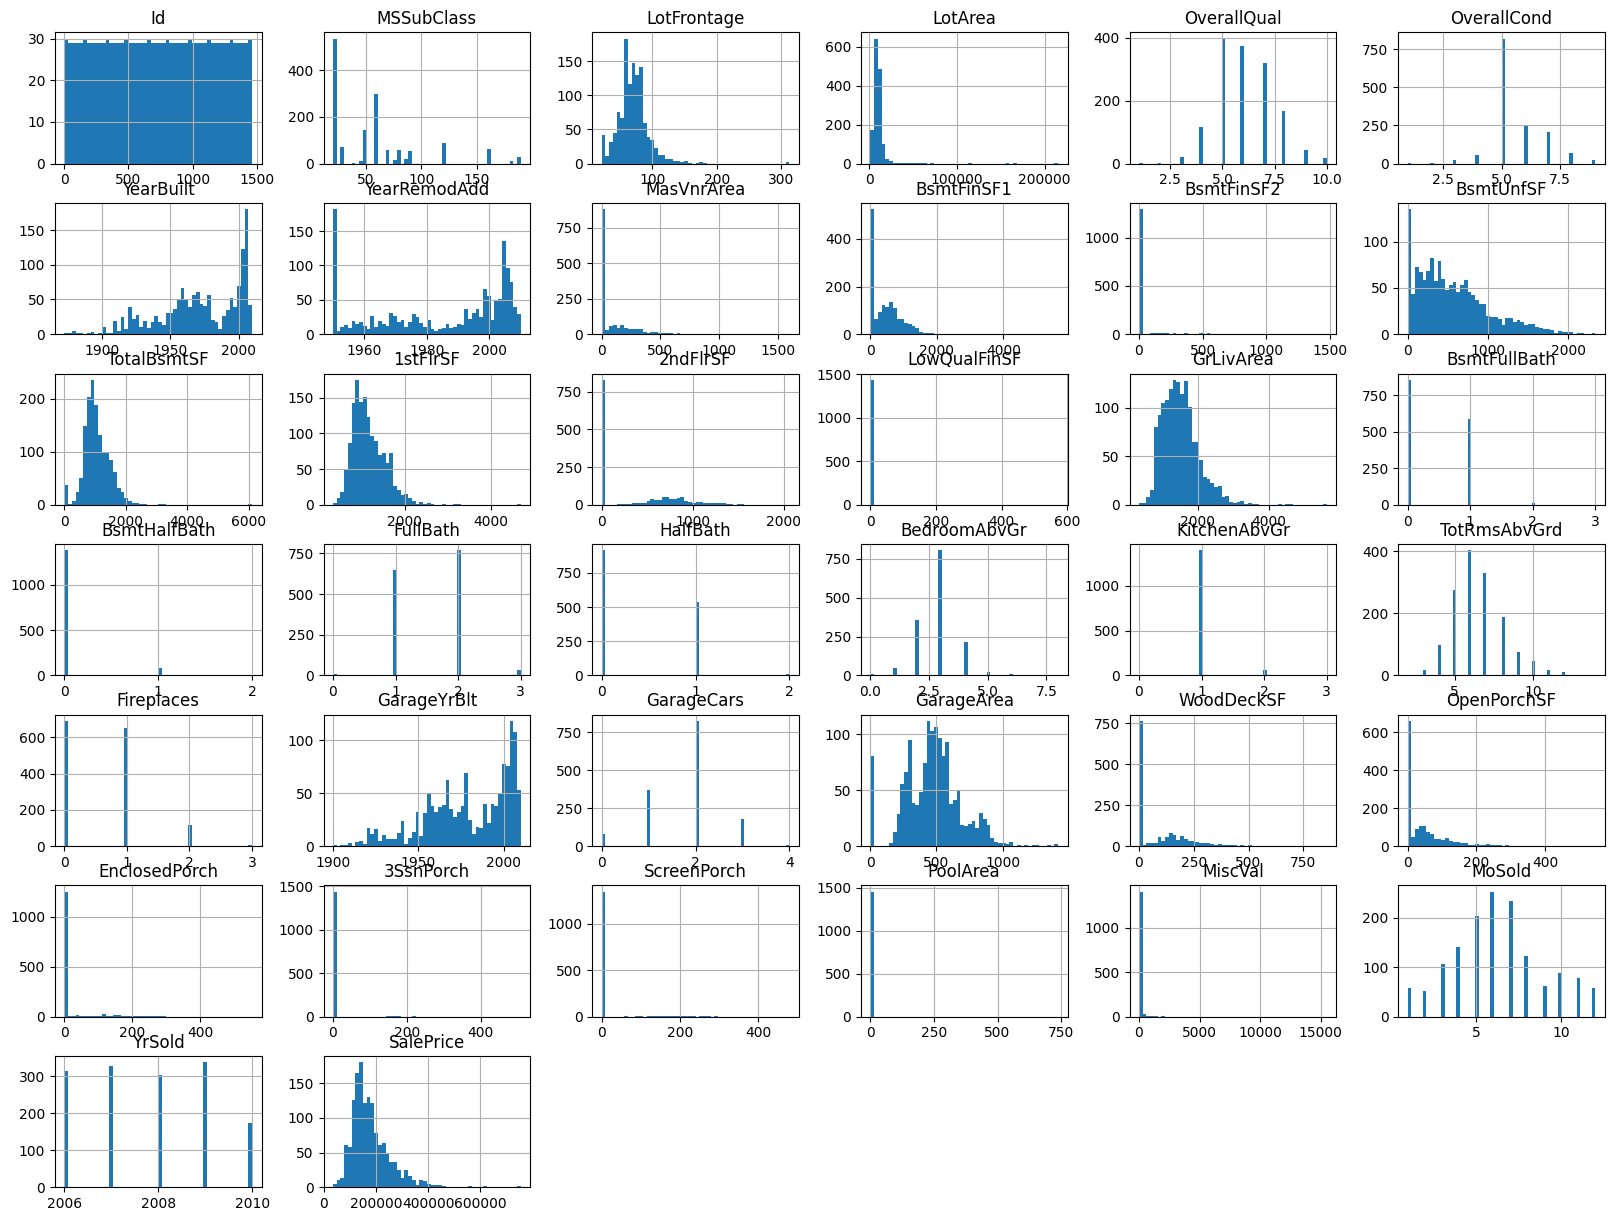

In [ ]:
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
'''
This dataset is 924 KB. There are 1460 entries with 80 features (if not conting id). There is some categorical data
like LandSlope and LotConfig. There are some missing values in the data. From the generated histograms, we can see that
most data points across all features are located around the "bell" of the curve; however, in many of the features like
SalePrice, LotArea, and LotFrontage, there are a few extreme outliers.
'''

## Step 3. Discover and visualize the data to gain insights
**Data Discovery:** Plot out all correlations among the features. You should notice some features are more correlated with your predicted value than others. This information will help you confirm the weights of your regression model later on.

In [48]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, shuffle=True, random_state=42)
visualize = train_set.copy()

In [ ]:
# Your code to visualize the data here
correlations = visualize.corr(numeric_only=True)
correlations.shape

(38, 38)

In [ ]:
correlations["SalePrice"].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.777892
GrLivArea,0.674807
GarageCars,0.637454
GarageArea,0.616631
TotalBsmtSF,0.593411
1stFlrSF,0.588018
FullBath,0.550514
YearBuilt,0.515217
TotRmsAbvGrd,0.508304


array([[<Axes: xlabel='SalePrice', ylabel='SalePrice'>,
        <Axes: xlabel='OverallQual', ylabel='SalePrice'>,
        <Axes: xlabel='GrLivArea', ylabel='SalePrice'>,
        <Axes: xlabel='GarageCars', ylabel='SalePrice'>,
        <Axes: xlabel='GarageArea', ylabel='SalePrice'>,
        <Axes: xlabel='1stFlrSF', ylabel='SalePrice'>],
       [<Axes: xlabel='SalePrice', ylabel='OverallQual'>,
        <Axes: xlabel='OverallQual', ylabel='OverallQual'>,
        <Axes: xlabel='GrLivArea', ylabel='OverallQual'>,
        <Axes: xlabel='GarageCars', ylabel='OverallQual'>,
        <Axes: xlabel='GarageArea', ylabel='OverallQual'>,
        <Axes: xlabel='1stFlrSF', ylabel='OverallQual'>],
       [<Axes: xlabel='SalePrice', ylabel='GrLivArea'>,
        <Axes: xlabel='OverallQual', ylabel='GrLivArea'>,
        <Axes: xlabel='GrLivArea', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageCars', ylabel='GrLivArea'>,
        <Axes: xlabel='GarageArea', ylabel='GrLivArea'>,
        <Axes: xlabel='1

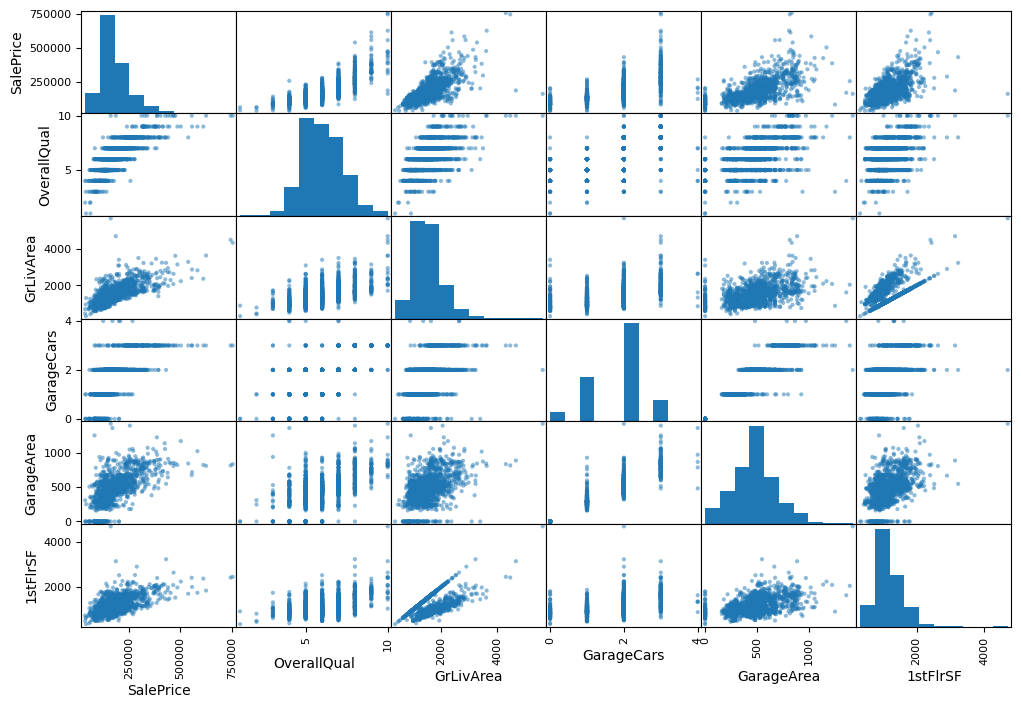

In [ ]:
# taking a look at each correlation > 0.6
from pandas.plotting import scatter_matrix

desired = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars", "GarageArea", "1stFlrSF"]

scatter_matrix(data[desired], figsize=(12, 8))

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

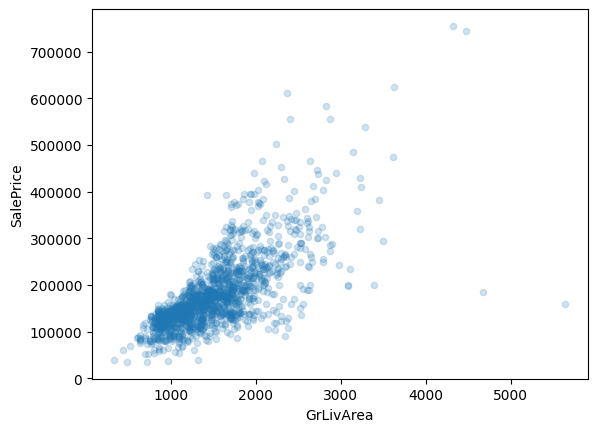

In [ ]:
# From the scatterplots I can see that SalePrice has the strongest correlations with GrLivArea, TotalBsmtSF, and 1stFlrSF.

data.plot(kind="scatter", x="GrLivArea", y="SalePrice", alpha=0.2)

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

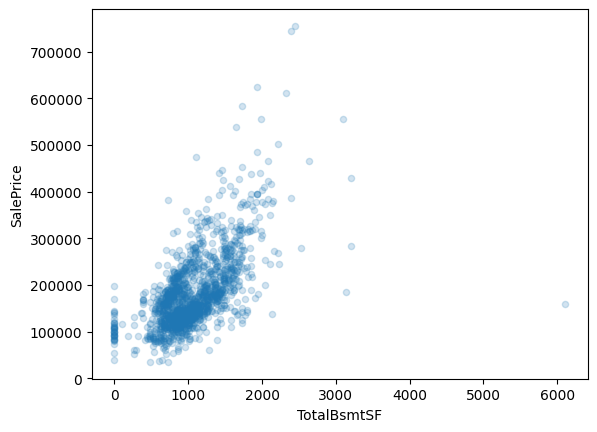

In [ ]:
data.plot(kind="scatter", x="TotalBsmtSF", y="SalePrice", alpha=0.2)

<Axes: xlabel='1stFlrSF', ylabel='SalePrice'>

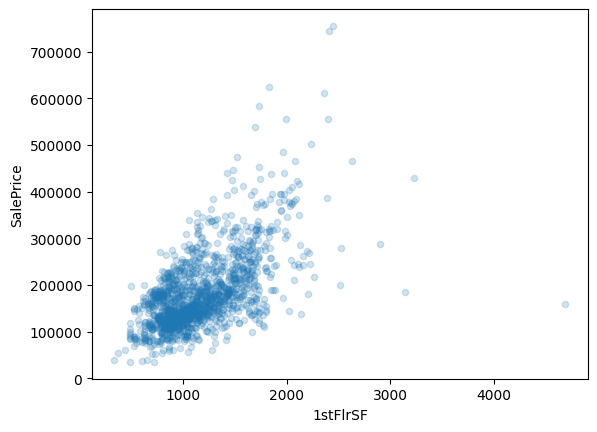

In [ ]:
data.plot(kind="scatter", x="1stFlrSF", y="SalePrice", alpha=0.2)

In [ ]:
# From these, GrLivArea seems the most promising with having a correlation with SalePrice so we proceed with that

##  Step 4: Data Preparation and Cleaning
Since we can only use the "train.csv", you have to "artificially" split the data into training set, validation set, and test set. You may use the `train_test_split()` function *twice*: first is to split into train and test, then to split the train again into training and validation sets.

Next, you need to construct the following:

* **Data Cleaning:** If your dataset has some missing values, make sure you are able to fill those values with the `Imputer` class.

* **Feature Scaling:** Your task is to call the `StandardScaler` to normalize the value of each feature.

* **Transformation Pipeline:** More importantly, you will need to integrate the above operations into a `Pipeline` to process and transform the training data (via `fit_transform()`), then use the same pipeline to transform any validation and testing data (using `transform()` only).

In [49]:
# Your code check for missing values, feature scaling, and put all transformation into a pipeline here

housing = train_set.drop("SalePrice", axis=1)
housing_labels = train_set["SalePrice"].copy()

test = test_set.drop("SalePrice", axis=1)
test_labels = test_set["SalePrice"].copy()

In [5]:
numerical_housing = housing.select_dtypes(include=[np.number])

In [6]:
categorical_housing = housing.select_dtypes(include=[object])

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(numerical_housing)
cat_attribs = list(categorical_housing)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

testing_prepared = full_pipeline.transform(test)

## Step 5: Model Selection
You should use (at the minimum) the basic ML models which we’ve covered: `LinearRegression`, `DecisionTreeRegressor`, `RandomForestRegressor`. Optionally, you may go for the extra miles by doing some research and try some more advanced models (ie. `Artificial Neural Networks`). You may use `RMSE` as the performance measure.

You must use 5-fold CV on the data set to evaluate the performance of your models (following the sample codes on Colab 02).


Linear Regression Model

In [54]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [16]:
# Try a few models here

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [52]:
from sklearn.model_selection import cross_val_score

scores_lin = cross_val_score(lin_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
lin_reg_rmse_scores = np.sqrt(-scores_lin)

In [55]:
display_scores(lin_reg_rmse_scores)

Scores: [29566.41792442 37240.56864427 75163.546261   39598.66083338
 36324.65777493]
Mean: 43578.770287600666
Standard deviation: 16140.509977850725


Decision Tree Regressor Model

In [56]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [57]:
scores_tree = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
tree_reg_rmse_scores = np.sqrt(-scores_tree)

In [58]:
display_scores(tree_reg_rmse_scores)

Scores: [57181.51537444 59468.54785023 57584.97820271 38744.53866585
 38258.10245676]
Mean: 50247.53650999702
Standard deviation: 9623.00007214488


Random Forest Regressor Model

In [59]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [60]:
score_forest = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=5)
forest_reg_rmse_scores = np.sqrt(-score_forest)

In [61]:
display_scores(forest_reg_rmse_scores)

Scores: [28707.69812954 35500.07954459 37185.3216612  25474.45605591
 25615.8057133 ]
Mean: 30496.672220907338
Standard deviation: 4940.001165070776


## Step 6: Model Tuning

In this step, you should attempt to use one of the provided tools for hyperparameter tuning: `GridSearchCV`, `RandomizedSearchCV` to identify the best set of hyperparameters for your model. After tweaking your models, you eventually should report the 5-fold CV RMSE of your tuned model.

In [116]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=250, high=500),
        'max_features': randint(low=40, high=60),
        'min_samples_split': randint(low=2, high=10),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b453273fcd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b453276d2a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b453273fd60>},
                   random_state=42, scoring='neg_mean_squared_error')

In [117]:
rnd_search.best_params_

{'max_features': 46, 'min_samples_split': 3, 'n_estimators': 460}

In [118]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

30708.280510826567 {'max_features': 46, 'min_samples_split': 5, 'n_estimators': 342}
30185.260425809924 {'max_features': 54, 'min_samples_split': 4, 'n_estimators': 321}
30075.5366152081 {'max_features': 46, 'min_samples_split': 3, 'n_estimators': 460}
30358.906222850273 {'max_features': 50, 'min_samples_split': 4, 'n_estimators': 337}
30732.378010439836 {'max_features': 43, 'min_samples_split': 9, 'n_estimators': 401}
30670.58022833372 {'max_features': 42, 'min_samples_split': 7, 'n_estimators': 302}
30729.897337142687 {'max_features': 41, 'min_samples_split': 9, 'n_estimators': 485}
30275.625461587762 {'max_features': 45, 'min_samples_split': 3, 'n_estimators': 441}
30473.617048434717 {'max_features': 40, 'min_samples_split': 5, 'n_estimators': 307}
30188.068950159028 {'max_features': 51, 'min_samples_split': 2, 'n_estimators': 298}


In [119]:
from sklearn.metrics import mean_squared_error

final = rnd_search.best_estimator_

final_predictions = final.predict(testing_prepared)
final_mse = mean_squared_error(test_labels, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

30310.840709245207

In [120]:
# confidence interval
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - test_labels) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([20329.9842119 , 37738.38723298])

## Step 7: Solution Presentation
Now that you need to write a short memo of one paragraph to be read by a non-technical audience (ie. your manager/supervisor). Focus on answering the following:

* How can you pitch your solution to this project?
* What did you learn so far about the problem?
* Is there any insight moving forward to improve the solution?

In [ ]:
'''
I have trained and tuned a machine learning model to predict housing prices in Ames, Iowa, based on a variety
of factors. I tried several different models, hyperparameters, and hyparameter tuning methods. For models, I
experimented with linear regression, decision tree, and random forest models all from SciKit Learn. Of these,
the Random Forest Regressor performed the best and thus I proceeded with it. From there, I felt that since there
was a variety of hyperparameters and hyperparameter values for me to try, I settled with a random search CV for
my hyperparameter tuning, also provided by SciKit Learn. After tuning and adjusting hyperparameter values, I
was able to tune down to an RMSE of 30311 when testing my model on the test set. From working with this problem
and analyzing the dataset, I was able to learn some insight about regression modeling and predicting housing prices.
For this dataset in particular, I could see that GrLivArea (the above ground living area in square feet), TotalBsmtSF
(the square footage of the basement), and 1stFlrSf (the square footage of the first floor) were all especially
strongly correlated with SalePrice. Moving forward, I believe this solution could be further improved by experimenting
with other models/regression techniques and further tuning of hyperparameters. While I believe my solution to be good,
I believe it can be done better.
'''

## Step 8: Model Launching, Monitoring, and Updating
You don't need to do anything for this step. However, in the real-world, this is an iterative process where you launch, monitor, and update your model (on the cloud).

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my slides and/or the textbook
 * Talk to the TA, they are available and there to help you during their office hours
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Codeathon 1:...".

Best of luck and have fun!